# Demo of Circuit Precompiling
---
## Basic Information
**Description:** This script presents a demo of the precompilation function, which transforms an initial logical circuit to one that can be directly implemented by a quantum hardware.\
**Note:** The result of the precompilation function is random, a feature inherited from `qiskit.transpile`.

In [208]:
# Load packages
from rustworkx import *
from rustworkx.visualization import mpl_draw

from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag
from matplotlib import pyplot as plt

import networkx as nx
import rustworkx as rx
import rustworkx.generators
import numpy as np
import time

%run functions/functions_set_graph.ipynb # import graph generator
%run functions/functions_subgraph_matching.ipynb # import subgraph matching functions
%run functions/functions_circuit_mapping.ipynb # import circuit mapping functions
%run functions/functions_test_circuits.ipynb # import the predefined circuits
%run functions/functions_precompilation.ipynb # import precompiling functions

In [209]:
# coupling graph type
graph_type = 'heavy_hex'

# set quantum circuit
circuit_width = 5
oracle = dj_oracle(circuit_width - 1)
input_circ = deutsch_jozsa_algorithm(oracle, circuit_width - 1) # input circuit
# save input circuit as .qasm file
qasm_string = input_circ.qasm() # convert the precompiled circuit to qasm operation string
qasm_filename = "figures_precompile/input_circ.qasm"
with open(qasm_filename, "w") as file:
    file.write(qasm_string)

# define a reduced hardware coupling map for precompilation
reduced_coupling_graph, node_dict, node_dict_reverse = set_heavy_hex_graph(5, 5)
directional_edge_list = list(reduced_coupling_graph.edge_list())
bidirectional_edge_list = []
for edge in directional_edge_list:
    bidirectional_edge_list.append((edge[0], edge[1]))
    bidirectional_edge_list.append((edge[1], edge[0]))
reduced_coupling_map = CouplingMap(bidirectional_edge_list)

# # precompilation, find an initial mapping of the circuit onto the hardware
# circ = precompile(circuit=input_circ, cmap=reduced_coupling_map)
# # save output circuit as .qasm file
# qasm_string = circ.qasm() # convert the precompiled circuit to qasm operation string
# qasm_filename = "figures_precompile/output_circ.qasm"
# with open(qasm_filename, "w") as file:
#     file.write(qasm_string)

# readout the precompiled circuit
with open("figures_precompile/output_circ.qasm", "r") as file:
    qasm_string = file.read()
circ = QuantumCircuit.from_qasm_str(qasm_string)

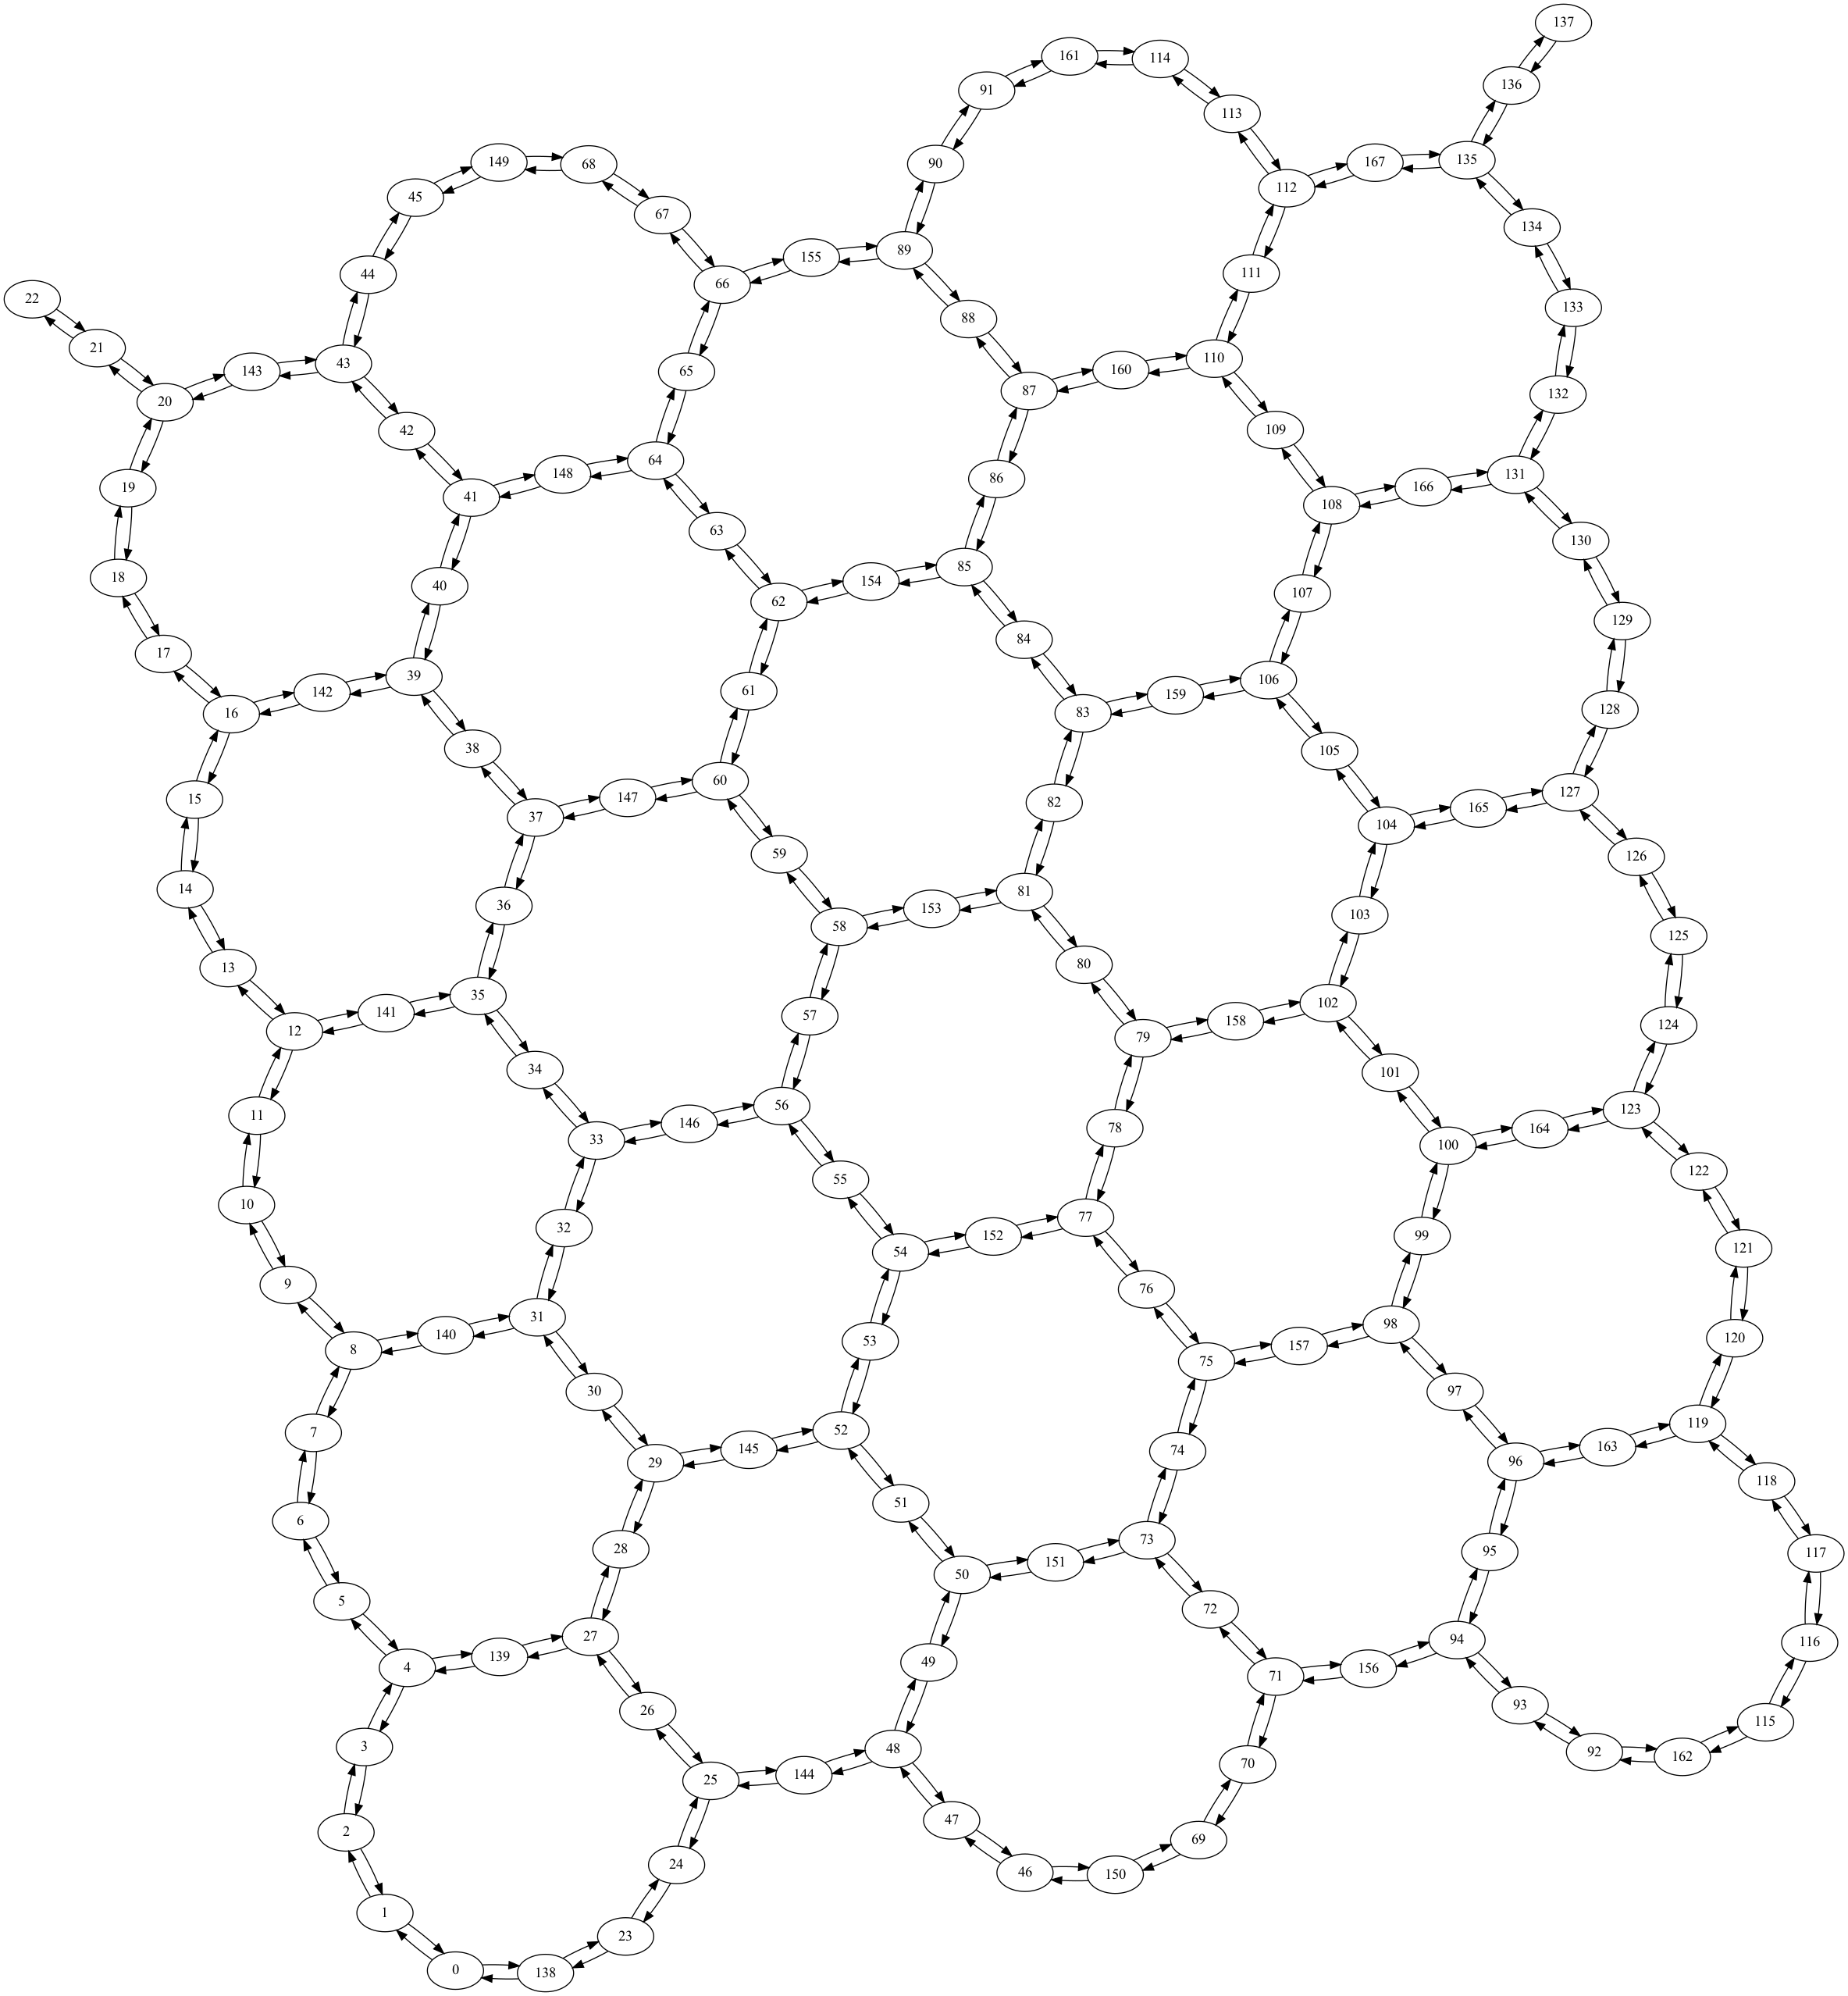

In [210]:
reduced_coupling_map.draw()

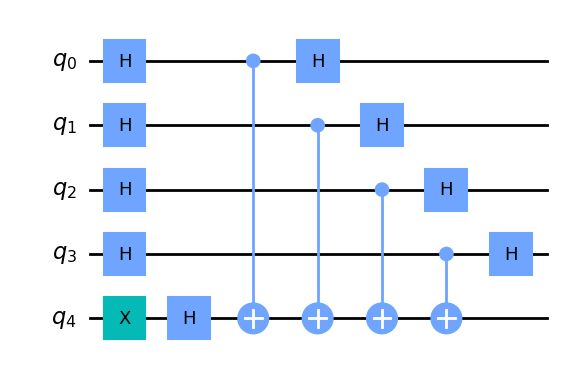

In [211]:
filename = 'figures_precompile/input_circuit.png'
input_circ.draw(output='mpl', filename=filename)

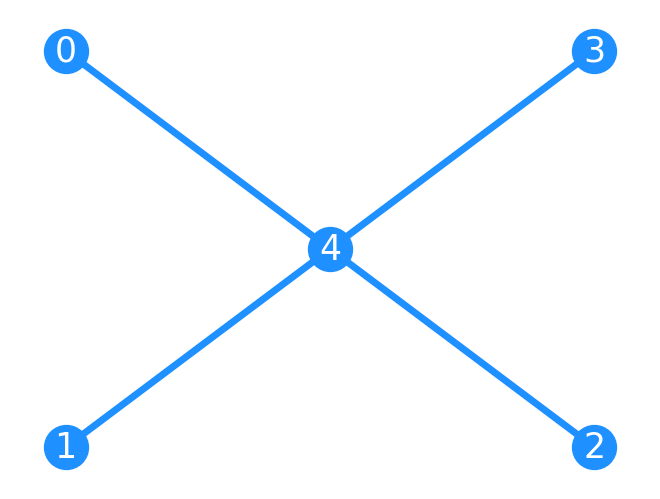

In [212]:
# define the qubit connectivity required by the circuit
input_circ_interaction_graph = circuit_interaction_graph(input_circ)
pos = {0:(-1, 1), 1:(-1, -1), 2:(1, -1), 3:(1, 1), 4:(0, 0)}
mpl_draw(input_circ_interaction_graph, pos=pos, with_labels=True, font_color='white', node_color='dodgerblue', edge_color='dodgerblue', width=5, font_size=25, node_size=1000)
filename = 'figures_precompile/input_interaction_graph.png'
plt.savefig(filename)

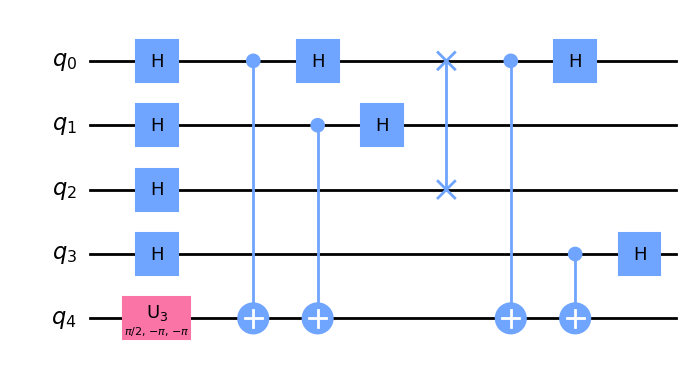

In [213]:
filename = 'figures_precompile/output_circuit.png'
circ.draw(output='mpl', filename=filename)

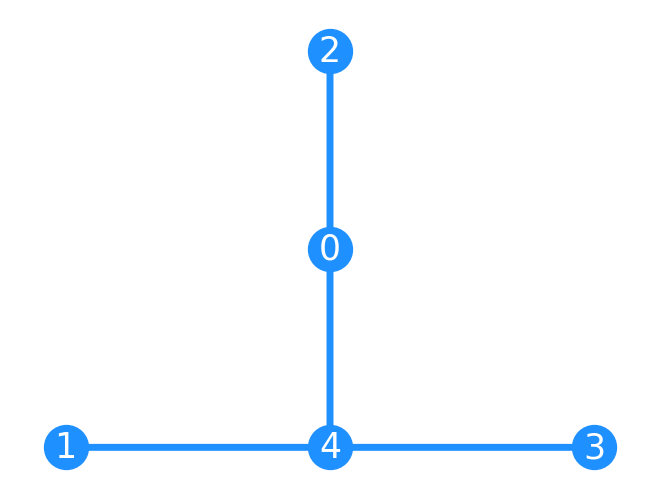

In [214]:
# define the qubit connectivity required by the circuit
circ_interaction_graph = circuit_interaction_graph(circ)
pos = {0:(0, 1), 1: (-1, 0), 2:(0, 2), 3:(1, 0), 4:(0, 0)}
mpl_draw(circ_interaction_graph, pos=pos, with_labels=True, font_color='white', node_color='dodgerblue', edge_color='dodgerblue', width=5, font_size=25, node_size=1000)
# mpl_draw(circ_interaction_graph, with_labels=True, font_color='white', node_color='dodgerblue', edge_color='dodgerblue', width=5, font_size=25, node_size=1000)
filename = 'figures_precompile/output_interaction_graph.png'
plt.savefig(filename)